# Connectivity issue

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools

from util import *

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

In [4]:
pd.set_option('max_colwidth', 100)

In [5]:
PATH_DATA = Path('.') / '..' / 'data'

## Issue description

In cases where one atom connects to multiple dummy atoms, the dummy atom's subpocket assignments are incorrect.

## Load fragment library

In [6]:
fragment_library_concat = pd.read_csv('../data/fragment_library/fragment_library.csv')
PandasTools.AddMoleculeColumnToFrame(fragment_library_concat, 'smiles')

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
0,AAK1,NAK,Other,5l4q,LKB,B,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP SE,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,[11*]c1cnc2[nH]cc(N[27*])c2c1,
1,AAK1,NAK,Other,5te0,XIN,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP SE GA,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 na na,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,
2,ABL1,Abl,TK,2f4j,VX6,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,Cc1cc(N)[nH]n1,[22*]Nc1cc(C)n[nH]1,
3,ABL1,Abl,TK,2gqg,1N1,B,A,AP,AP AP AP AP AP AP AP AP AP AP GA SE,14 14 14 6 5 5 14 14 14 6 na na,Nc1ncc(C=O)s1,[15*]Nc1ncc(C([41*])=O)s1,
4,ABL1,Abl,TK,2v7a,627,,B,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP SE FP,8 8 8 8 8 5 5 6 6 8 8 8 8 8 8 8 8 8 8 3 3 3 3 3 na na,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,[8*]C(=O)Nc1n[nH]c2cn(C(=O)[C@@H]([46*])OC)cc12,

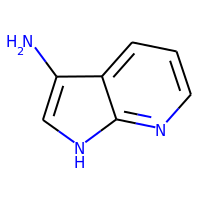
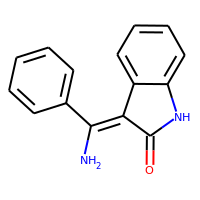
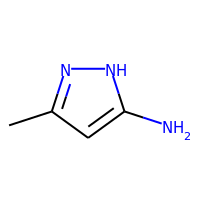
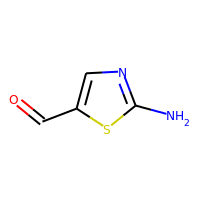
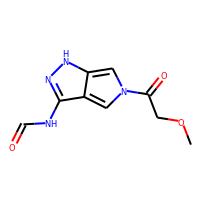

In [7]:
fragment_library_concat.head()

## Get example structures

### Correct fragmentation (3w2s)

In [8]:
complex_pdb = '3w2s'

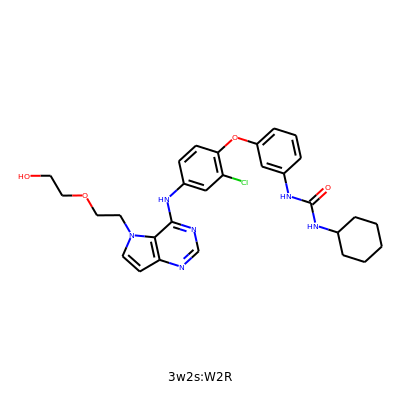

In [9]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1039,EGFR,EGFR,TK,3w2s,W2R,A,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP GA FP,9 9 9 9 9 9 9 9 9 9 9 9 5 5 na na,Nc1ncnc2cc[nH]c12,[23*]Nc1ncnc2ccn([46*])c12,
3298,EGFR,EGFR,TK,3w2s,W2R,A,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,8 8 8 8 8 8 4 4 4 4 4 4 3 3 3 na,CCOCCO,[60*]CCOCCO,
6361,EGFR,EGFR,TK,3w2s,W2R,A,A,GA,GA GA GA GA GA GA GA GA GA GA GA B1 AP,16 16 16 16 16 16 16 16 16 3 16 na na,Oc1ccccc1Cl,[24*]Oc1ccc([61*])cc1Cl,
7058,EGFR,EGFR,TK,3w2s,W2R,A,A,B1,B1 B1 B1 B1 B1 B1 B1 B1 B1 B1 GA B2,16 16 16 16 16 16 16 16 16 16 na na,c1ccccc1,[63*]c1cccc([70*])c1,
7127,EGFR,EGFR,TK,3w2s,W2R,A,A,B2,B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B1,1 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 5 5 5 5 1 na,NC(=O)NC1CCCCC1,[22*]NC(=O)NC1CCCCC1,

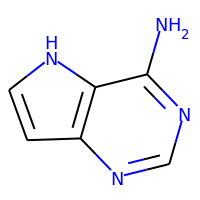
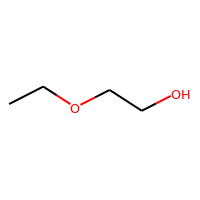
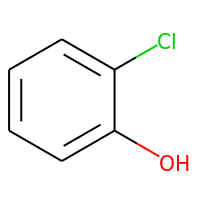
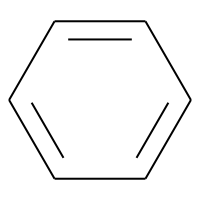
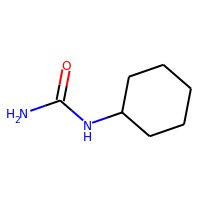

In [10]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect example (4yjq)

In [11]:
complex_pdb ='4yjq'

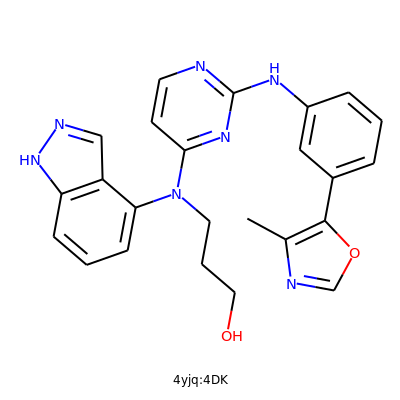

In [12]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Correct assignments to neighbors are:

- GA: AP and FP(1) (on same GA atom) **[but is in code FP and FP]**
- AP: GA and SE
- FP(1): GA
- SE: AP and FP(2)
- FP(2): SE

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
2221,SYK,Syk,TK,4yjq,4DK,A,A,AP,AP AP AP AP AP AP AP AP AP AP GA SE,5 5 14 14 14 14 14 14 14 14 na na,Nc1ncccn1,[17*]Nc1nccc([28*])n1,
4215,SYK,Syk,TK,4yjq,4DK,A,A,FP,FP FP FP FP FP FP FP FP FP FP SE,8 8 8 8 14 14 14 14 14 14 na,Cc1cocn1,[10*]c1ocnc1C,
4216,SYK,Syk,TK,4yjq,4DK,A,A,FP,FP FP FP FP FP FP FP FP FP FP FP GA,4 4 4 4 4 4 4 4 4 3 3 na,CCCO,[28*]CCCO,
5781,SYK,Syk,TK,4yjq,4DK,A,A,SE,SE SE SE SE SE SE SE SE SE SE AP FP,16 16 16 16 16 16 16 16 16 16 na na,c1ccccc1,[9*]c1cccc([18*])c1,
6811,SYK,Syk,TK,4yjq,4DK,A,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA FP FP,5 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na na,Nc1cccc2[nH]ncc12,[26*]N([29*])c1cccc2[nH]ncc12,

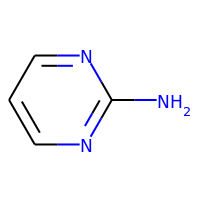
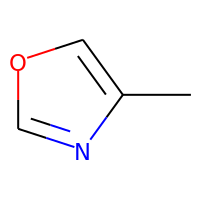
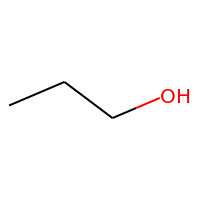
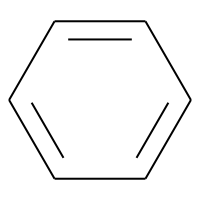
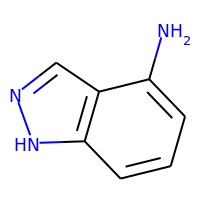

In [13]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect example (4jr3)

In [14]:
complex_pdb = '4jr3'

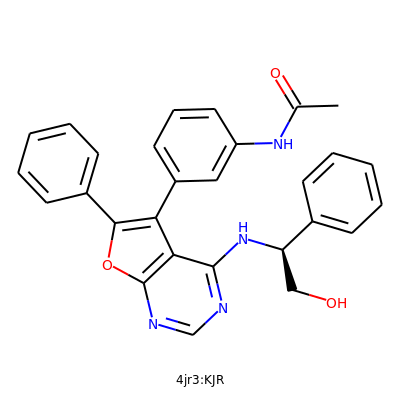

In [15]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Correct assignments to neighbors are:

- AP: SE and FP(1) and FP(2)
- FP(1): AP and GA **[but is in code AP and AP]**
- SE: AP
- FP(2): AP
- GA: FP(1)

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1047,EGFR,EGFR,TK,4jr3,KJR,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP FP SE FP,16 16 16 16 16 16 16 16 16 16 5 5 na na na,Nc1ncnc2occc12,[17*]c1c([21*])oc2ncnc(N[41*])c12,
3304,EGFR,EGFR,TK,4jr3,KJR,,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,1 1 1 1 1 1 5 5 16 16 16 16 16 16 16 16 16 16 na,CC(=O)Nc1ccccc1,[18*]c1cccc(NC(C)=O)c1,
3305,EGFR,EGFR,TK,4jr3,KJR,,A,FP,FP FP FP FP FP FP FP AP AP,8 8 8 8 8 3 3 na na,CCO,[39*][C@@H]([48*])CO,
5085,EGFR,EGFR,TK,4jr3,KJR,,A,SE,SE SE SE SE SE SE SE SE SE SE SE AP,16 16 16 16 16 16 16 16 16 16 16 na,c1ccccc1,[20*]c1ccccc1,
6369,EGFR,EGFR,TK,4jr3,KJR,,A,GA,GA GA GA GA GA GA GA GA GA GA GA FP,16 16 16 16 16 16 16 16 16 16 16 na,c1ccccc1,[41*]c1ccccc1,

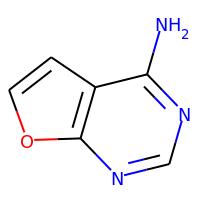
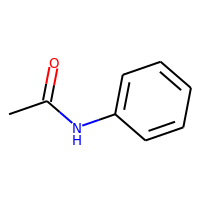
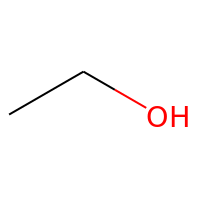
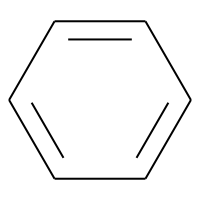
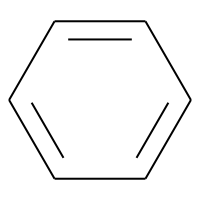

In [16]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect example which is correct by luck (5ew9)

In [17]:
complex_pdb = '5ew9'

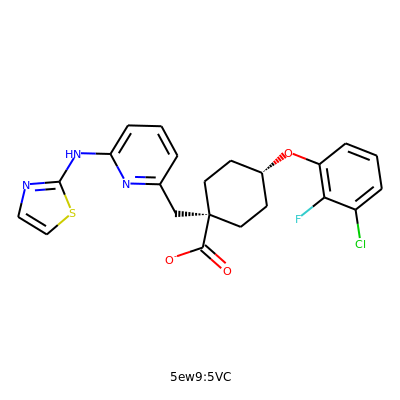

In [18]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
142,AurA,Aur,Other,5ew9,5VC,A,A,AP,AP AP AP AP AP AP AP AP AP SE,14 14 14 14 14 14 14 5 5 na,Nc1nccs1,*Nc1nccs1,
2680,AurA,Aur,Other,5ew9,5VC,A,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP SE SE,16 16 3 16 16 16 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 15 15 15 15 15 15 na na,Fc1c(Cl)cccc1OC1CCCCC1,[23*][C@]1([27*])CC[C@H](Oc2cccc(Cl)c2F)CC1,
4542,AurA,Aur,Other,5ew9,5VC,A,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE AP FP,14 14 14 14 14 14 14 14 8 8 8 14 na na,Cc1ccccn1,[21*]c1cccc(C[26*])n1,
4543,AurA,Aur,Other,5ew9,5VC,A,A,SE,SE SE SE FP,6 6 6 na,O=C[O-],[26*]C(=O)[O-],

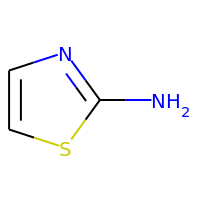
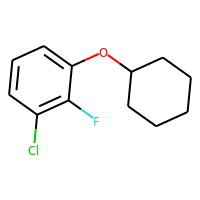
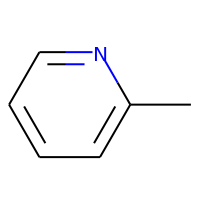
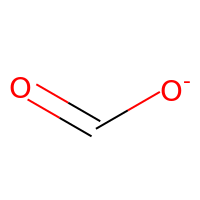

In [19]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect example which is correct by luck (6c2t)

In [20]:
complex_pdb = '6c2t'

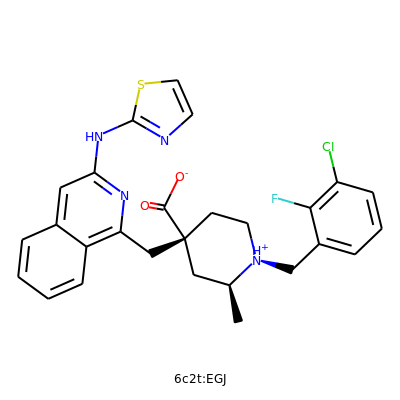

In [21]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
145,AurA,Aur,Other,6c2t,EGJ,B,A,AP,AP AP AP AP AP AP AP AP AP SE,14 14 14 14 14 14 5 5 14 na,Nc1nccs1,[26*]Nc1nccs1,
2682,AurA,Aur,Other,6c2t,EGJ,B,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP ...,16 16 16 16 16 16 16 16 16 15 15 15 15 15 15 15 15 15 15 15 15 8 8 8 8 8 8 8 15 15 16 16 na na,C[C@H]1CCCC[N@H+]1Cc1cccc(Cl)c1F,[28*][C@]1([48*])CC[N@@H+](Cc2cccc(Cl)c2F)[C@@H](C)C1,
4546,AurA,Aur,Other,6c2t,EGJ,B,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 14 8 8 8 14 na na,Cc1nccc2ccccc12,[40*]Cc1nc([55*])cc2ccccc12,
4547,AurA,Aur,Other,6c2t,EGJ,B,A,SE,SE SE SE FP,6 6 6 na,O=C[O-],[40*]C(=O)[O-],

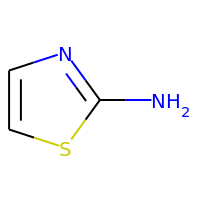
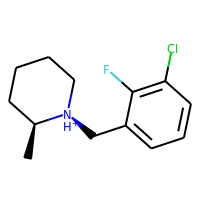
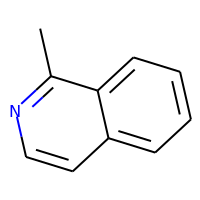
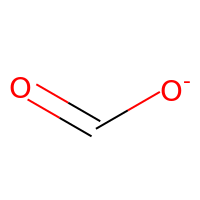

In [22]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (1h07)

In [23]:
complex_pdb = '1h07'

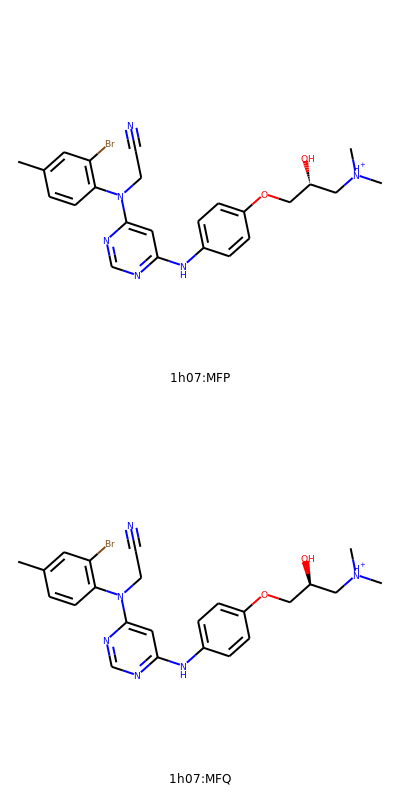

In [24]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
293,CDK2,CDK,CMGC,1h07,MFQ,B,A,AP,AP AP AP AP AP AP AP AP AP AP AP GA GA SE,14 14 14 14 14 14 14 14 5 5 5 na na na,Nc1cc(N)ncn1,[12*]N([16*])c1cc(N[25*])ncn1,
2793,CDK2,CDK,CMGC,1h07,MFQ,B,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 8 8 8 8 16 na,Cc1cccc(Br)c1,[28*]c1ccc(C)cc1Br,
4634,CDK2,CDK,CMGC,1h07,MFQ,B,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE X-SE AP,16 16 16 16 16 16 16 16 16 16 3 4 4 4 4 4 4 4 4 3 3 na na,C[C@H](O)COc1ccccc1,[31*]c1ccc(OC[C@@H](O)C[49*])cc1,
6089,CDK2,CDK,CMGC,1h07,MFQ,B,A,GA,GA GA GA GA GA AP,4 4 4 4 4 na,CC#N,[28*]CC#N,
7264,CDK2,CDK,CMGC,1h07,MFQ,B,A,X,X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE SE,5 5 5 5 5 5 5 5 5 5 na,C[NH2+]C,[46*][NH+](C)C,

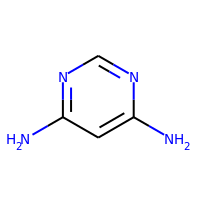
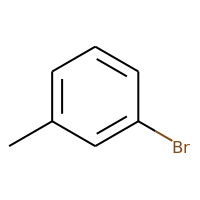
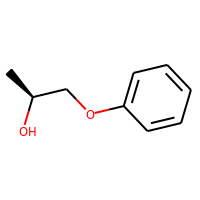
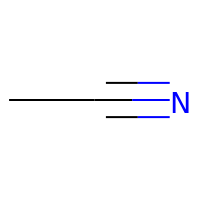
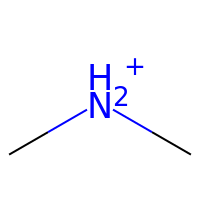

In [25]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (2iw6)

In [26]:
complex_pdb = '2iw6'

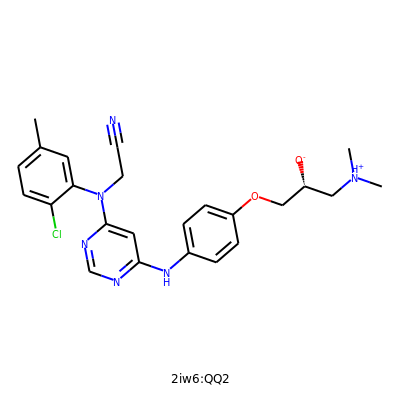

In [27]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
369,CDK2,CDK,CMGC,2iw6,QQ2,,A,AP,AP AP AP AP AP AP AP AP AP AP AP GA GA SE,14 14 14 14 14 14 14 14 5 5 5 na na na,Nc1cc(N)ncn1,[13*]N([17*])c1cc(N[21*])ncn1,
2853,CDK2,CDK,CMGC,2iw6,QQ2,,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 8 8 8 8 na,Cc1ccc(Cl)cc1,[24*]c1cc(C)ccc1Cl,
4688,CDK2,CDK,CMGC,2iw6,QQ2,,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE X-SE AP,16 16 16 16 16 16 16 16 16 16 3 4 4 4 4 4 4 4 4 4 na na,C[C@@H]([O-])COc1ccccc1,[26*]c1ccc(OC[C@H]([O-])C[44*])cc1,
6102,CDK2,CDK,CMGC,2iw6,QQ2,,A,GA,GA GA GA GA GA AP,4 4 4 4 4 na,CC#N,[24*]CC#N,
7271,CDK2,CDK,CMGC,2iw6,QQ2,,A,X,X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE SE,5 5 5 5 5 5 5 5 5 5 na,C[NH2+]C,[41*][NH+](C)C,

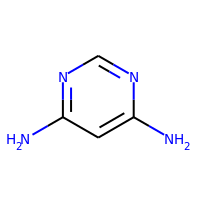
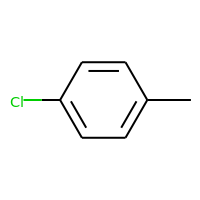
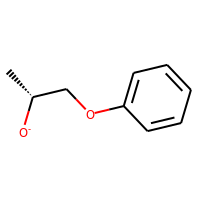
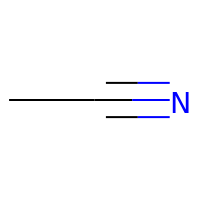
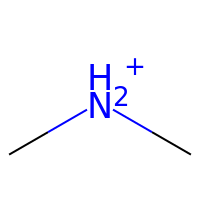

In [28]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (2xvd)

In [29]:
complex_pdb = '2xvd'

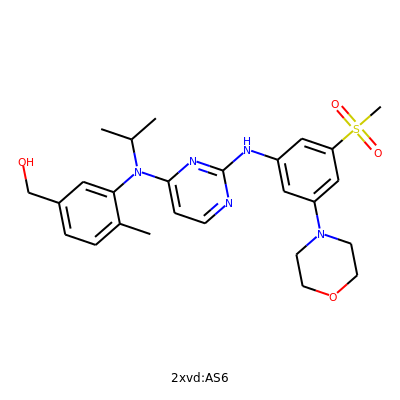

In [30]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1132,EphB4,Eph,TK,2xvd,AS6,A,A,AP,AP AP AP AP AP AP AP AP AP AP AP FP FP SE,5 14 14 14 14 14 14 14 5 5 14 na na na,Nc1ccnc(N)n1,[4*]N([51*])c1ccnc(N[20*])n1,
3375,EphB4,Eph,TK,2xvd,AS6,A,A,FP,FP FP FP FP FP FP FP FP FP FP AP,4 4 4 4 4 4 4 4 4 4 na,CCC,[10*]C(C)C,
5147,EphB4,Eph,TK,2xvd,AS6,A,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE AP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 5 5 5 5 5 5 5 5 5 5 5 5 na,CS(=O)(=O)c1cccc(N2CCOCC2)c1,[18*]c1cc(N2CCOCC2)cc(S(C)(=O)=O)c1,
6431,EphB4,Eph,TK,2xvd,AS6,A,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA AP,16 16 16 16 8 8 8 3 3 16 16 16 16 16 8 8 8 8 na,Cc1ccc(CO)cc1,[10*]c1cc(CO)ccc1C,

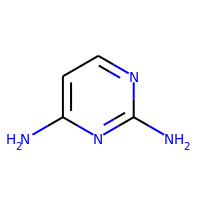
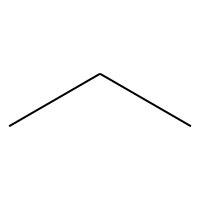
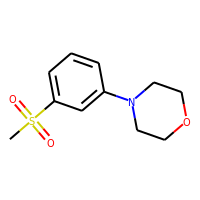
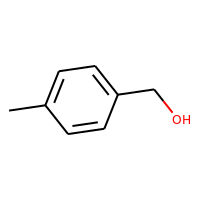

In [31]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (5ew8)

In [32]:
complex_pdb = '5ew8'

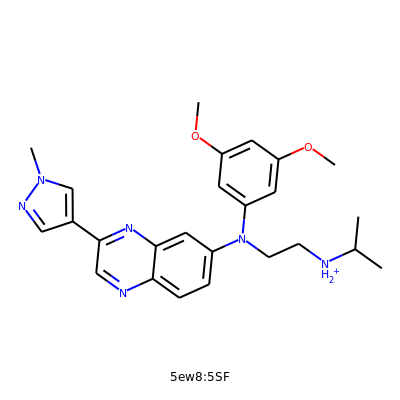

In [33]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1262,FGFR1,FGFR,TK,5ew8,5SF,B,B,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP GA SE,14 14 14 14 14 14 14 14 14 14 14 14 14 14 na na,c1ccc2nccnc2c1,[18*]c1cnc2ccc([46*])cc2n1,
3464,FGFR1,FGFR,TK,5ew8,5SF,B,B,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP GA,4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 4 4 4 4 na,CC[NH2+]C(C)C,[46*]CC[NH2+]C(C)C,
5237,FGFR1,FGFR,TK,5ew8,5SF,B,B,SE,SE SE SE SE SE SE SE SE SE SE SE AP,16 16 16 16 16 8 8 8 8 16 16 na,Cn1cccn1,[15*]c1cnn(C)c1,
6493,FGFR1,FGFR,TK,5ew8,5SF,B,B,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA FP FP,16 16 16 16 16 16 3 3 3 3 3 16 16 3 3 3 3 3 16 5 na na,COc1cc(N)cc(OC)c1,[47*]N([57*])c1cc(OC)cc(OC)c1,

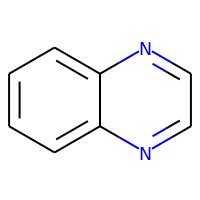
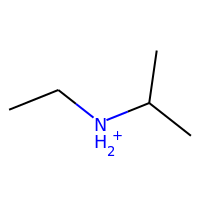
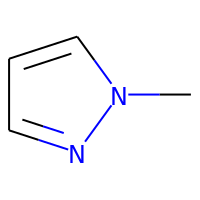
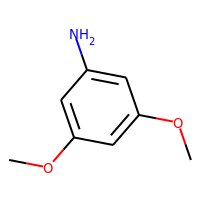

In [34]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (2ofu)

In [35]:
complex_pdb = '2ofu'

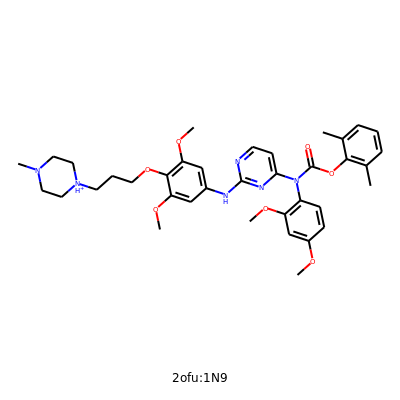

In [36]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1663,LCK,Src,TK,2ofu,1N9,,A,AP,AP AP AP AP AP AP AP AP AP AP AP GA SE GA,14 14 14 14 14 14 14 14 5 5 5 na na na,Nc1ccnc(N)n1,[10*]Nc1nccc(N([12*])[14*])n1,
3779,LCK,Src,TK,2ofu,1N9,,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 3 3 3 3 3 3 3 3 3 3 na,COc1cccc(OC)c1,[11*]c1ccc(OC)cc1OC,
5509,LCK,Src,TK,2ofu,1N9,,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE X-SE AP,16 16 16 16 16 16 16 16 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 3 3 3 3 3 na na,CCCOc1c(OC)cccc1OC,[8*]c1cc(OC)c(OCCC[88*])c(OC)c1,
6632,LCK,Src,TK,2ofu,1N9,,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA AP,1 3 16 16 16 16 16 16 16 16 16 8 8 8 8 8 8 8 8 1 na,Cc1cccc(C)c1OC=O,[11*]C(=O)Oc1c(C)cccc1C,
7397,LCK,Src,TK,2ofu,1N9,,A,X,X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE X-SE SE,5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 na,CN1CC[NH2+]CC1,[70*][NH+]1CCN(C)CC1,

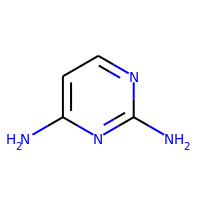
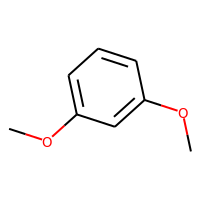
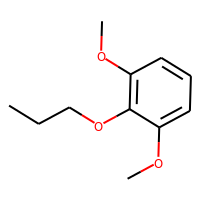
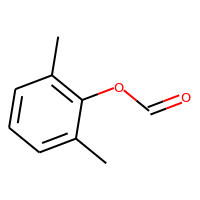
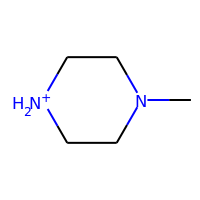

In [37]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (4xmo)

In [38]:
complex_pdb = '4xmo'

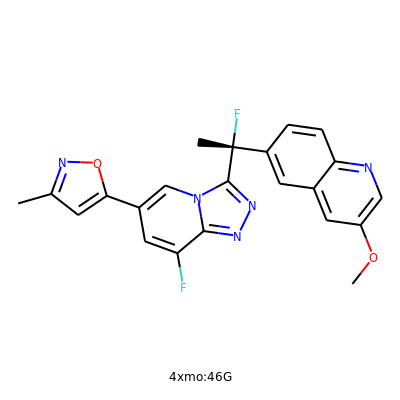

In [39]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1802,MET,Met,TK,4xmo,46G,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP GA,16 16 16 16 16 16 16 3 3 3 3 3 16 16 16 16 16 16 16 16 na,COc1cnc2ccccc2c1,[22*]c1ccc2ncc(OC)cc2c1,
3883,MET,Met,TK,4xmo,46G,,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP GA,8 8 8 8 14 14 14 14 14 14 16 16 16 16 16 16 16 16 16 16 16 16 na,Cc1cc(-c2cc(F)c3nncn3c2)on1,[22*]c1nnc2c(F)cc(-c3cc(C)no3)cn12,
6676,MET,Met,TK,4xmo,46G,,A,GA,GA GA GA GA GA GA FP FP,8 8 8 8 8 8 na na,CCF,[21*][C@]([28*])(C)F,

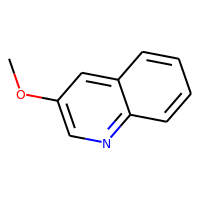
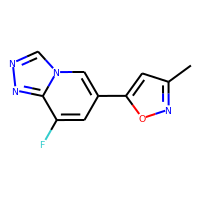
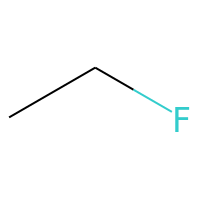

In [40]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (5eob)

In [41]:
complex_pdb = '5eob'

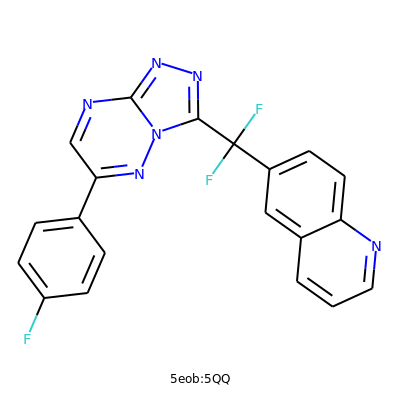

In [42]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1804,MET,Met,TK,5eob,5QQ,A,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP GA,16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1ccc2ncccc2c1,*c1ccc2ncccc2c1,
3885,MET,Met,TK,5eob,5QQ,A,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP GA,16 16 16 16 16 16 16 16 16 14 14 14 14 14 14 14 14 14 14 16 16 na,Fc1ccc(-c2cnc3nncn3n2)cc1,*c1nnc2ncc(-c3ccc(F)cc3)nn12,
6677,MET,Met,TK,5eob,5QQ,A,A,GA,GA GA GA FP FP,8 8 8 na na,FCF,[24*]C([27*])(F)F,

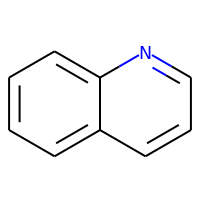
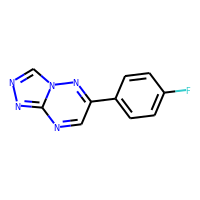
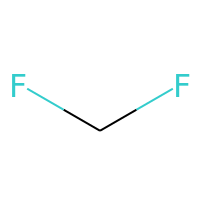

In [43]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (4yjp)

In [44]:
complex_pdb = '4yjp'

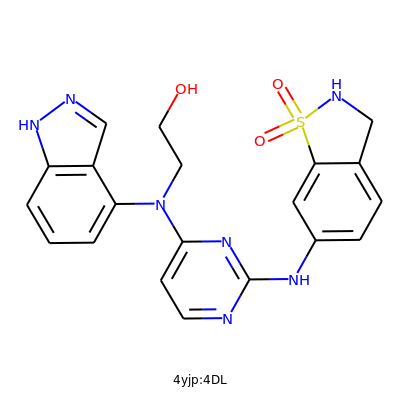

In [45]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
2219,SYK,Syk,TK,4yjp,4DL,,A,AP,AP AP AP AP AP AP AP AP GA,3 3 4 4 4 4 4 4 na,CCO,[8*]CCO,
2220,SYK,Syk,TK,4yjp,4DL,,A,AP,AP AP AP AP AP AP AP AP AP AP GA SE,14 14 14 14 14 14 14 5 5 14 na na,Nc1ncccn1,[8*]c1ccnc(N[18*])n1,
5780,SYK,Syk,TK,4yjp,4DL,,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE AP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,O=S1(=O)NCc2ccccc21,[16*]c1ccc2c(c1)S(=O)(=O)NC2,
6810,SYK,Syk,TK,4yjp,4DL,,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA AP AP,5 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na na,Nc1cccc2[nH]ncc12,[5*]N([9*])c1cccc2[nH]ncc12,

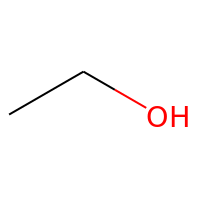
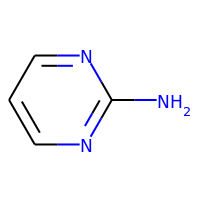
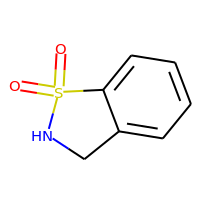
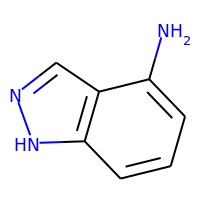

In [46]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (4yjr)

In [47]:
complex_pdb = '4yjr'

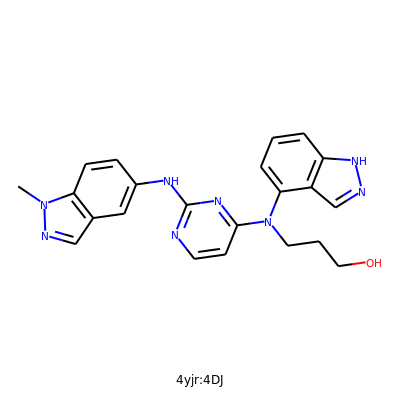

In [48]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
2222,SYK,Syk,TK,4yjr,4DJ,C,A,AP,AP AP AP AP AP AP AP AP AP AP AP FP SE FP,5 5 14 14 14 14 14 14 14 14 5 na na na,Nc1ccnc(N)n1,[11*]Nc1nccc(N([23*])[34*])n1,
4217,SYK,Syk,TK,4yjr,4DJ,C,A,FP,FP FP FP FP FP FP FP FP FP FP FP AP,4 4 4 4 4 4 4 4 4 3 3 na,CCCO,[22*]CCCO,
5782,SYK,Syk,TK,4yjr,4DJ,C,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE AP,8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 na,Cn1ncc2ccccc21,[12*]c1ccc2c(cnn2C)c1,
6812,SYK,Syk,TK,4yjr,4DJ,C,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA AP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1ccc2[nH]ncc2c1,[22*]c1cccc2[nH]ncc12,

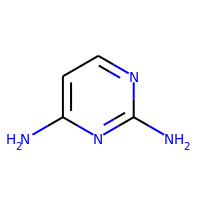
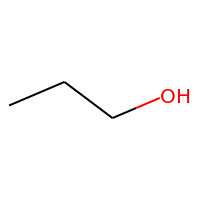
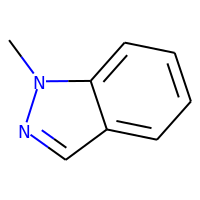
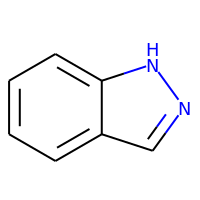

In [49]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (4yjs)

In [50]:
complex_pdb = '4yjs'

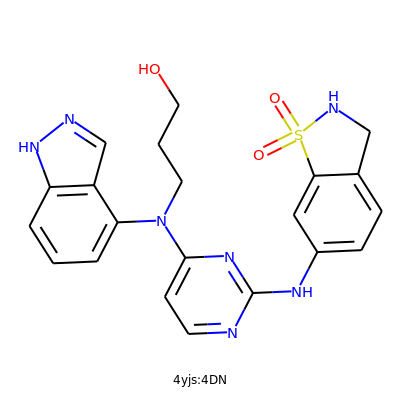

In [51]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
2223,SYK,Syk,TK,4yjs,4DN,,A,AP,AP AP AP AP AP AP AP AP AP AP GA SE,5 5 14 14 14 14 14 14 14 14 na na,Nc1ncccn1,[6*]Nc1nccc([27*])n1,
4218,SYK,Syk,TK,4yjs,4DN,,A,FP,FP FP FP FP FP FP FP FP FP FP FP GA,4 4 4 4 4 4 4 4 4 3 3 na,CCCO,[27*]CCCO,
5783,SYK,Syk,TK,4yjs,4DN,,A,SE,SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE SE AP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,O=S1(=O)NCc2ccccc21,[17*]c1ccc2c(c1)S(=O)(=O)NC2,
6813,SYK,Syk,TK,4yjs,4DN,,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA FP FP,5 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na na,Nc1cccc2[nH]ncc12,[21*]N([28*])c1cccc2[nH]ncc12,

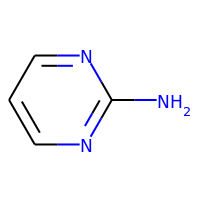
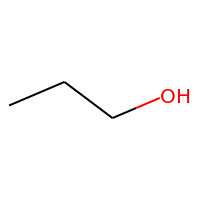
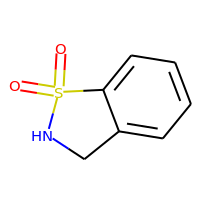
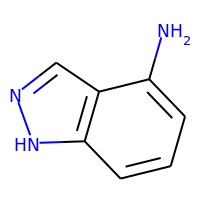

In [52]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)

### Incorrect (2i0h)

In [53]:
complex_pdb = '2i0h'

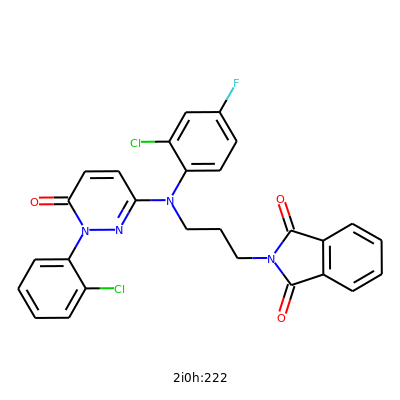

In [54]:
draw_ligands_from_pdb_ids([complex_pdb], sub_img_size=(400,400))

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
2461,p38a,MAPK,CMGC,2i0h,222,B,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP GA,9 16 16 16 16 16 16 16 16 16 16 9 9 9 16 9 9 9 9 9 na,O=c1cccnn1-c1ccccc1Cl,[20*]c1ccc(=O)n(-c2ccccc2Cl)n1,
4396,p38a,MAPK,CMGC,2i0h,222,B,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP GA,8 8 8 8 8 8 8 8 8 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 na,CCCN1C(=O)c2ccccc2C1=O,[20*]CCCN1C(=O)c2ccccc2C1=O,
6924,p38a,MAPK,CMGC,2i0h,222,B,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA FP FP,5 16 16 16 16 16 16 16 16 16 16 16 na na,Nc1ccc(F)cc1Cl,[17*]N([21*])c1ccc(F)cc1Cl,

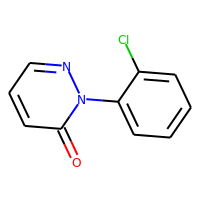
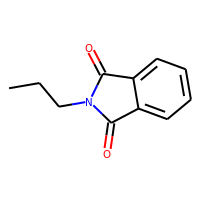
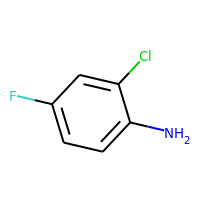

In [55]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb)